# ★★★★★용량 제한 문제상 노드 개념 정리 블로그에 올려놓았습니다!!!!★★★★★


https://velog.io/@sed2461/%EC%9D%B5%EC%8A%A4-15-OCR-%EA%B0%9C%EB%85%90-%EC%A0%95%EB%A6%AC

# 다양한 OCR모델 비교하기

- Google OCR API
- keras-ocr
- Tesseract

## 맡은 임무 : 식당 차리기
- 간판 만들기
- 광고판 만들기

# Google OCR API

- pip install --upgrade google-api-python-client
- pip install google-cloud-vision

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# 유료로 전환시 가능
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
#!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png' 

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
#detect_text(path)

# keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

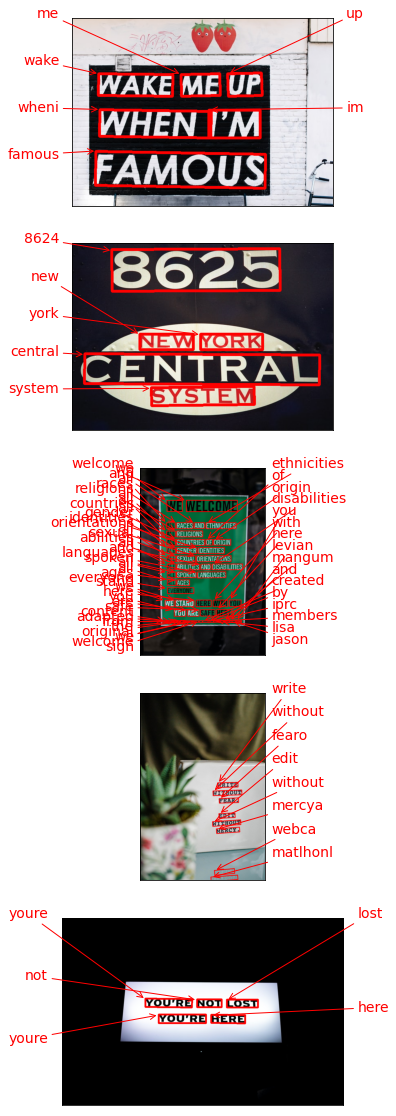

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract

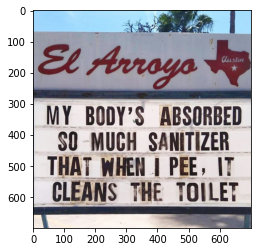

/aiffel/aiffel/ocr_python/eng_0000.png
/aiffel/aiffel/ocr_python/eng_0001.png
/aiffel/aiffel/ocr_python/eng_0002.png
/aiffel/aiffel/ocr_python/eng_0003.png
/aiffel/aiffel/ocr_python/eng_0004.png
/aiffel/aiffel/ocr_python/eng_0005.png
/aiffel/aiffel/ocr_python/eng_0006.png
/aiffel/aiffel/ocr_python/eng_0007.png
/aiffel/aiffel/ocr_python/eng_0008.png
/aiffel/aiffel/ocr_python/eng_0009.png
/aiffel/aiffel/ocr_python/eng_0010.png
/aiffel/aiffel/ocr_python/eng_0011.png
/aiffel/aiffel/ocr_python/eng_0012.png
/aiffel/aiffel/ocr_python/eng_0013.png
/aiffel/aiffel/ocr_python/eng_0014.png
/aiffel/aiffel/ocr_python/eng_0015.png
/aiffel/aiffel/ocr_python/eng_0016.png
/aiffel/aiffel/ocr_python/eng_0017.png
/aiffel/aiffel/ocr_python/eng_0018.png
/aiffel/aiffel/ocr_python/eng_0019.png


In [9]:
import os
import pytesseract
from PIL import Image
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"eng_{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()




cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

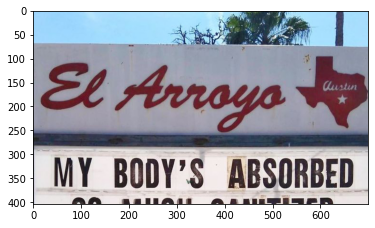

Sage



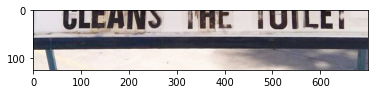

 ULERNO IMC iUILe:



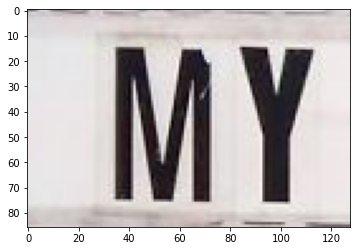

MY



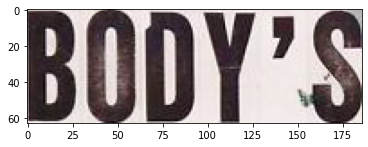

BODY'S



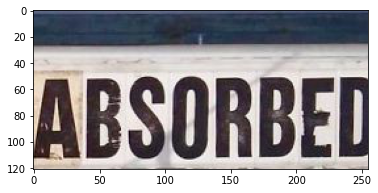

BSORBEL



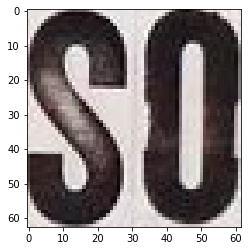

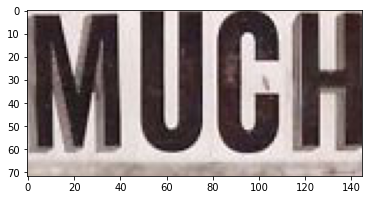

MUGH



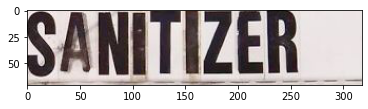

SANITIZER —



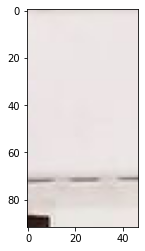

—



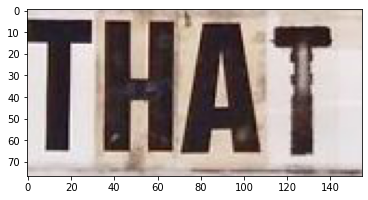

THAT



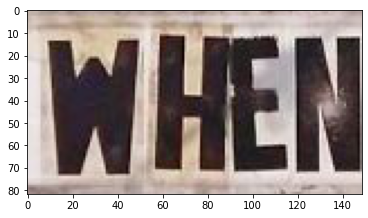

WHEN



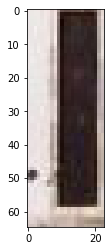

j



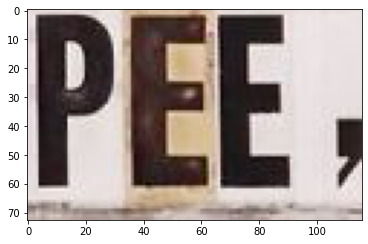

PEE.



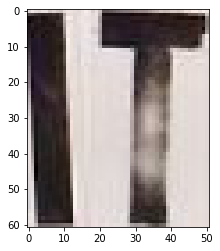

if



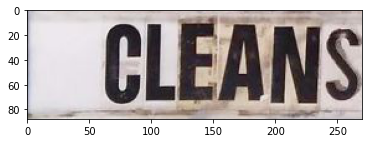

— CLEANS



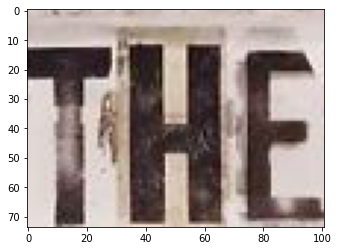

THE



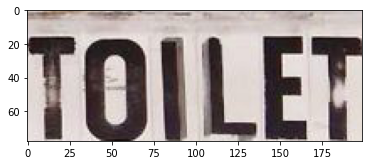

TOILET



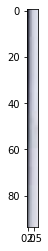

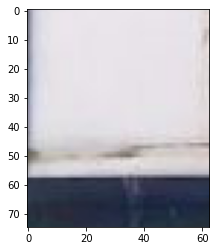

al



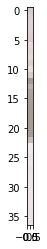


Done


In [10]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

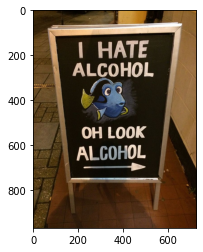

/aiffel/aiffel/ocr_python/2/eng_0000.png
/aiffel/aiffel/ocr_python/2/eng_0001.png
/aiffel/aiffel/ocr_python/2/eng_0002.png
/aiffel/aiffel/ocr_python/2/eng_0003.png
/aiffel/aiffel/ocr_python/2/eng_0004.png
/aiffel/aiffel/ocr_python/2/eng_0005.png
/aiffel/aiffel/ocr_python/2/eng_0006.png
/aiffel/aiffel/ocr_python/2/eng_0007.png
/aiffel/aiffel/ocr_python/2/eng_0008.png
/aiffel/aiffel/ocr_python/2/eng_0009.png
/aiffel/aiffel/ocr_python/2/eng_0010.png
/aiffel/aiffel/ocr_python/2/eng_0011.png
/aiffel/aiffel/ocr_python/2/eng_0012.png
/aiffel/aiffel/ocr_python/2/eng_0013.png
/aiffel/aiffel/ocr_python/2/eng_0014.png
/aiffel/aiffel/ocr_python/2/eng_0015.png
/aiffel/aiffel/ocr_python/2/eng_0016.png
/aiffel/aiffel/ocr_python/2/eng_0017.png


In [14]:
import os
import pytesseract
from PIL import Image
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"eng_{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/2'
img_file_path = work_dir + '/test_image_2.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()




cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

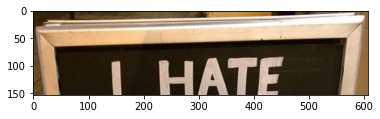

, | HATE ;



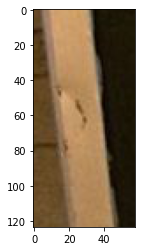

1



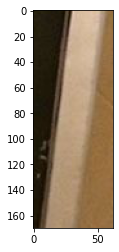

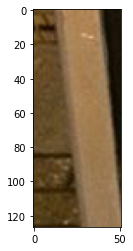

\



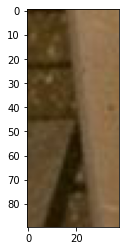

1



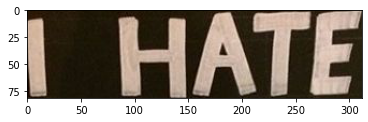

| HATE



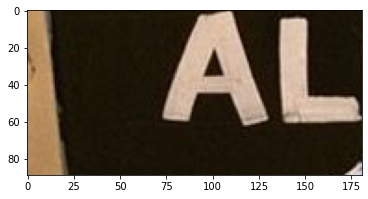

mu



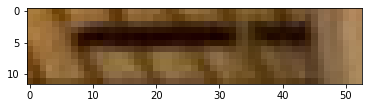

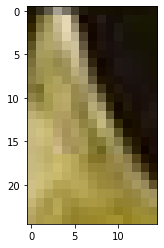

N



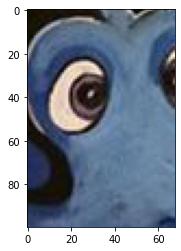

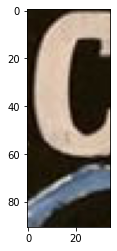

St



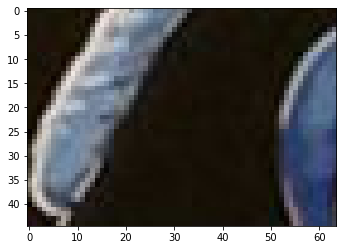

G



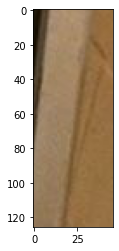

|



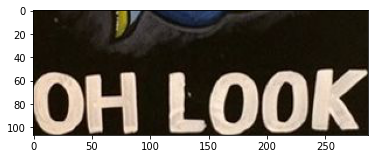

TTY



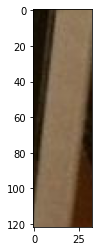

F



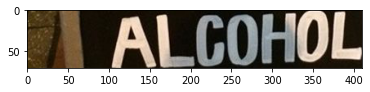

~\ ALCOHOL



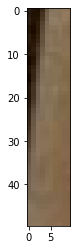

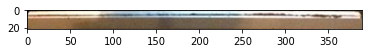

a |

Done


In [15]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

# [회고]

똑같은 사진이더라도, 컴퓨터로 인쇄된 것 같은 글씨체냐, 사람이 직접 쓴 글씨체냐에 따라, 인식의 정확도가 큰 차이가 난다는 것을 알게 되었습니다..
매장 개업하기가 쉬운 일이 아니군요..